# Plot a case

Here we pick out a case and look in detail at the results

In [1]:
import os
import pickle
import numpy as np
import scipy.interpolate as spi
import matplotlib.pyplot as plt
%matplotlib inline

import flayer
import particle_evolution
import feo_thermodynamics as feot
import multiprocessing
import bulk_case_runner
import earth_model
import layer_setup

# Light blue square

In [2]:
data = bulk_case_runner.load_case_data('/Users/andreww/Code/slurry_cases/light_blue_hetro/cases_details/case_40.0_0.01.pkl')

# Some data missing from files
analysis_radii = np.linspace(data["r_icb"], data["r_icb"] + data["f_layer_thickness"],
                                     data["number_of_analysis_points"])

data["analysis_radii"] = analysis_radii  

In [3]:
np.nanmax(data["nucleation_rates"])

6.100066951954931e-10

In [4]:
data["solid_vf"]*100

array([0.00000000e+000, 1.05039221e-007, 9.22371157e-008, 8.07245625e-008,
       7.04063569e-008, 6.11823017e-008, 5.29496214e-008, 4.55989387e-008,
       3.90899663e-008, 3.33757295e-008, 2.83469762e-008, 2.39452311e-008,
       2.01047386e-008, 1.67650333e-008, 1.38761241e-008, 1.14026637e-008,
       9.29248758e-009, 7.51047214e-009, 6.01511246e-009, 4.77087259e-009,
       3.74191190e-009, 2.89837264e-009, 2.21925314e-009, 1.67713247e-009,
       1.25262912e-009, 9.26640281e-010, 6.74531981e-010, 4.83190184e-010,
       3.39773935e-010, 2.33797388e-010, 1.57203055e-010, 1.03119470e-010,
       6.57488160e-011, 4.06431131e-011, 2.41184918e-011, 1.37909635e-011,
       7.53790956e-012, 3.93057787e-012, 1.93379672e-012, 8.90049952e-013,
       3.71242721e-013, 1.44446358e-013, 4.96593557e-014, 1.40267899e-014,
       4.66827318e-015, 1.11164236e-015, 2.18607399e-016, 3.45519926e-017,
       4.21295963e-018, 3.72435949e-019, 2.37965752e-020, 9.07271596e-022,
       2.20124305e-023, 2

Particle radii between 0.0162 and 1.22e-05 m


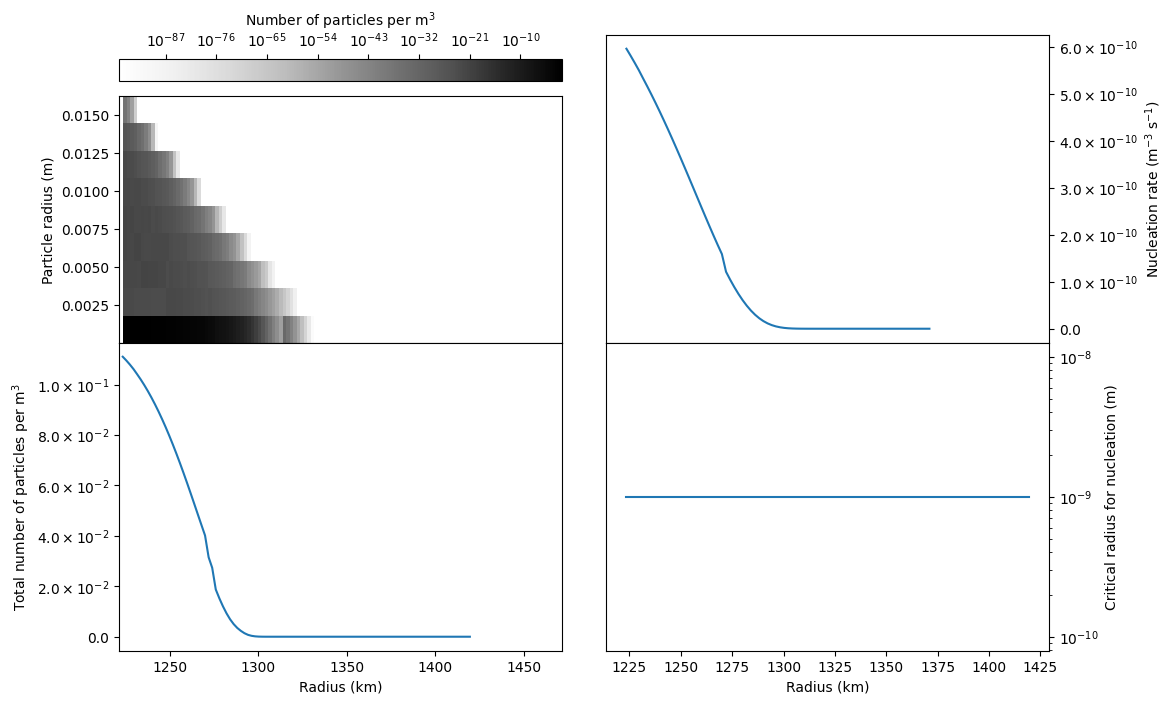

In [5]:
bulk_case_runner.plot_case_csd_nuc(logscale=True, nonuc=False, **data)


Particle radii between 0.0201 and 1.22e-05 m


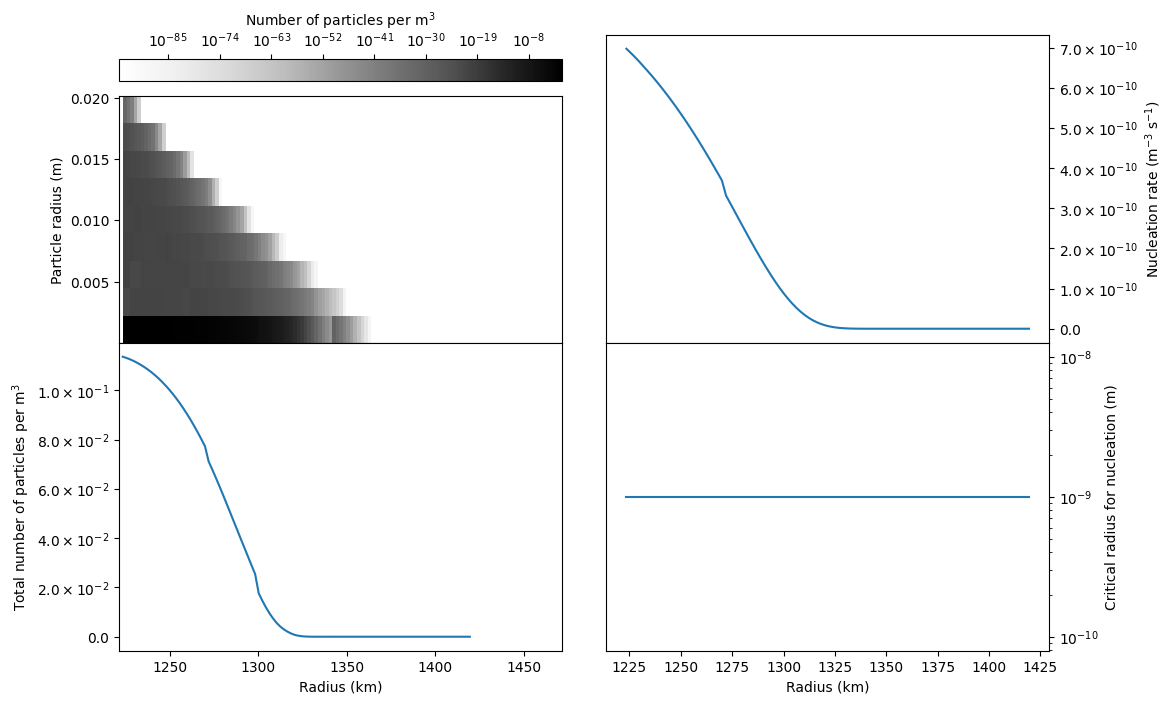

In [6]:
# Light blue diamond

data = bulk_case_runner.load_case_data('/Users/andreww/Code/slurry_cases/light_blue_hetro/cases_details/case_-25.0_-0.000625.pkl')

# Some data missing from files
analysis_radii = np.linspace(data["r_icb"], data["r_icb"] + data["f_layer_thickness"],
                                     data["number_of_analysis_points"])

data["analysis_radii"] = analysis_radii  

bulk_case_runner.plot_case_csd_nuc(logscale=True, nonuc=False, **data)


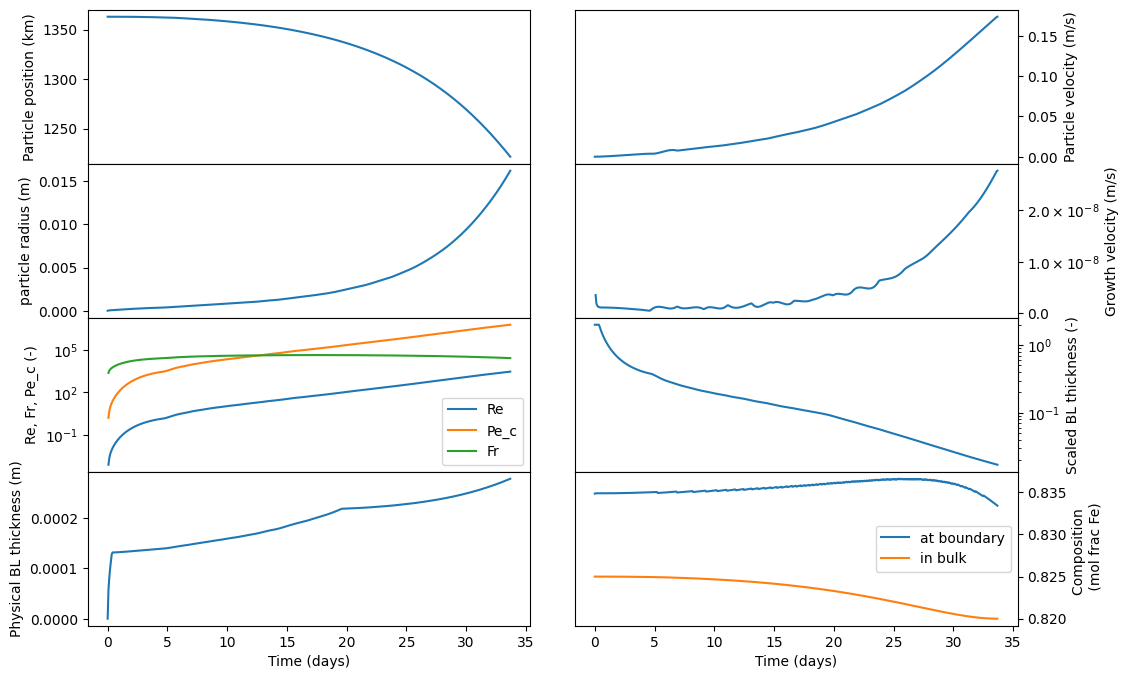

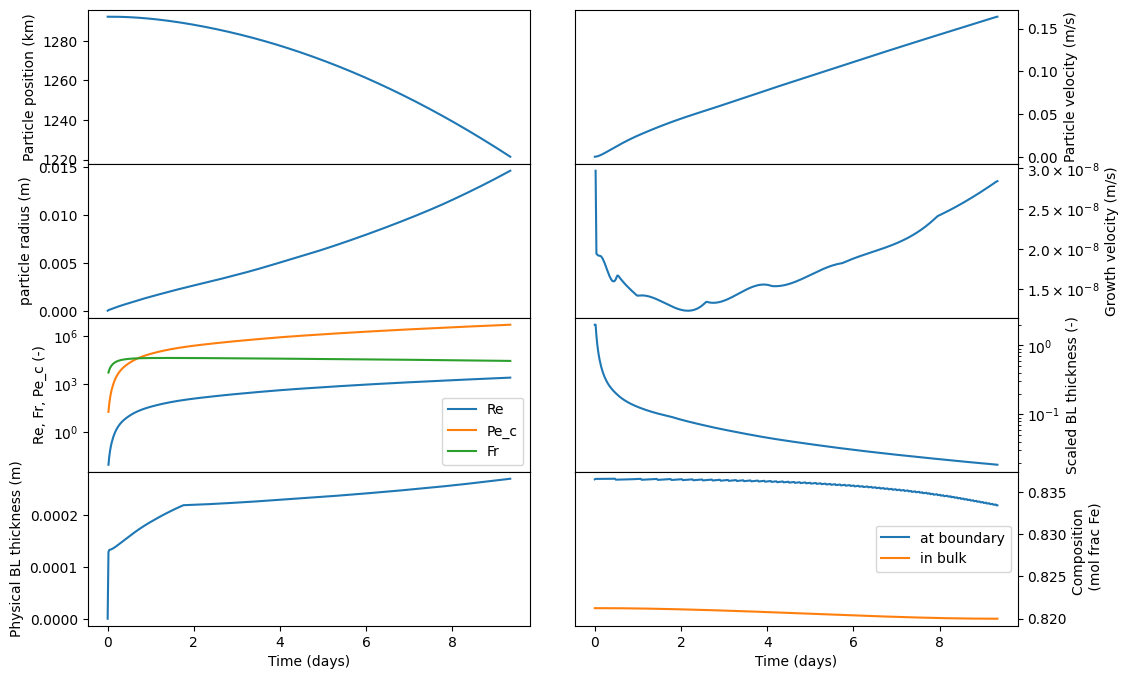

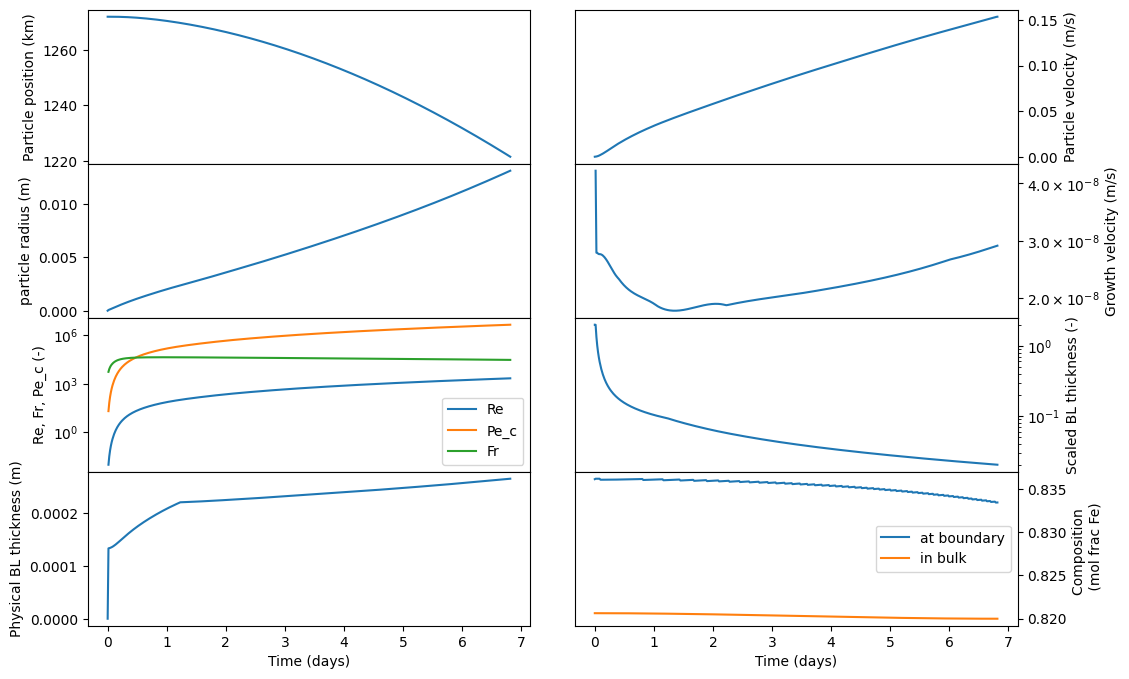

In [4]:
# Reuse general layer setup code, but we don't need many of the functions
# so we never need to rerun this (fairly expensive) function

r_icb = data["r_icb"]
r_flayer_top = data["r_icb"] + data["f_layer_thickness"]
_, adiabatic_temperature_function, _, _, _, pressure_function, gravity_function, _ \
            = layer_setup.setup_flayer_functions(data["r_icb"], data["r_cmb"],
                                                 data["f_layer_thickness"], 
                                                 data["gruneisen_parameter"], 10, 
                                                 data["xfe_outer_core"],
                                                 data["xfe_outer_core"], data["analysis_radii"])


temperature_function = layer_setup.fit_quad_func_boundaries(
            r_icb, r_flayer_top, adiabatic_temperature_function(r_icb)+40.0, 
            adiabatic_temperature_function(r_flayer_top))
composition_function = layer_setup.fit_quad_func_boundaries(
            r_icb, r_flayer_top, data["xfe_outer_core"]-0.01, data["xfe_outer_core"])


particle_evolution.plot_particle_evolution_time(data["solutions"][70], composition_function, temperature_function,
                                                pressure_function, data["chemical_diffusivity"], data["growth_prefactor"],
                                                gravity_function, data["kinematic_viscosity"])

particle_evolution.plot_particle_evolution_time(data["solutions"][35], composition_function, temperature_function,
                                                pressure_function, data["chemical_diffusivity"], data["growth_prefactor"],
                                                gravity_function, data["kinematic_viscosity"])

particle_evolution.plot_particle_evolution_time(data["solutions"][25], composition_function, temperature_function,
                                                pressure_function, data["chemical_diffusivity"], data["growth_prefactor"],
                                                gravity_function, data["kinematic_viscosity"])

# Light blue diamond

Particle radii between 0.0234 and 1.19e-05 m


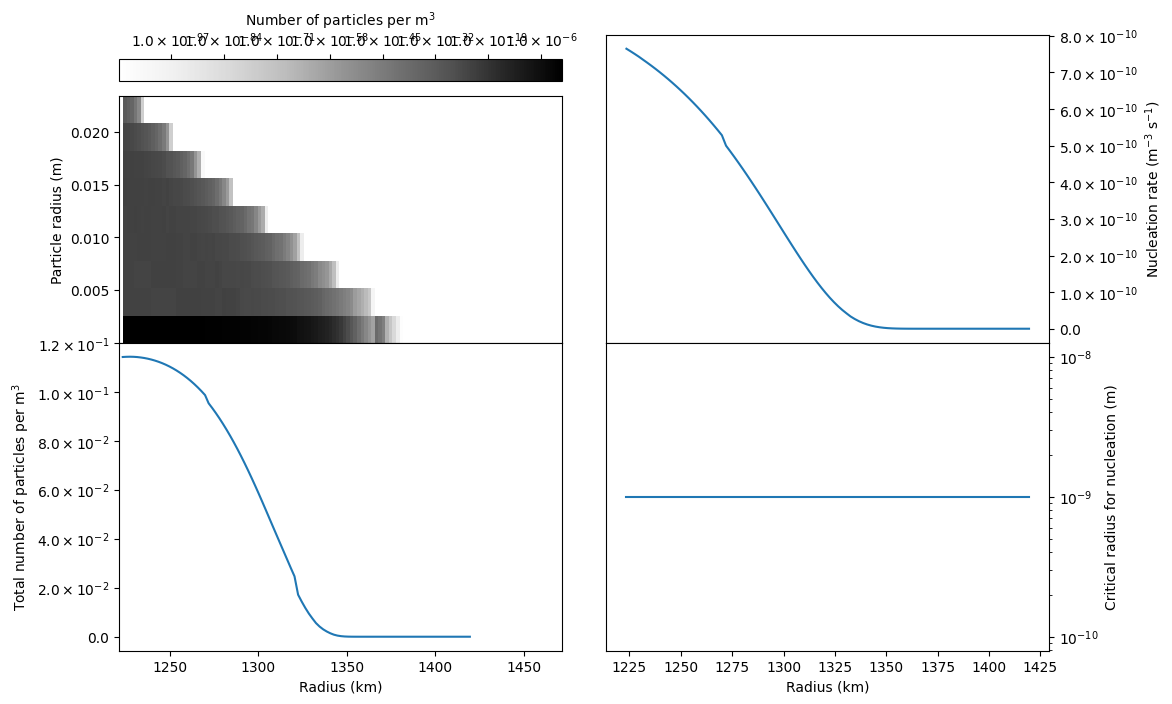

In [21]:
data = bulk_case_runner.load_case_data('/Users/andreww/Code/slurry_cases/light_blue_hetro/cases_details/case_-25.0_0.000625.pkl')

# Some data missing from files
analysis_radii = np.linspace(data["r_icb"], data["r_icb"] + data["f_layer_thickness"],
                                     data["number_of_analysis_points"])

data["analysis_radii"] = analysis_radii  

bulk_case_runner.plot_case_csd_nuc(logscale=True, nonuc=False, **data)


In [19]:
# Reuse general layer setup code, but we don't need many of the functions
# so we never need to rerun this (fairly expensive) function

r_icb = data["r_icb"]
r_flayer_top = data["r_icb"] + data["f_layer_thickness"]
_, adiabatic_temperature_function, _, _, _, pressure_function, gravity_function, _ \
            = layer_setup.setup_flayer_functions(data["r_icb"], data["r_cmb"],
                                                 data["f_layer_thickness"], 
                                                 data["gruneisen_parameter"], 10, 
                                                 data["xfe_outer_core"],
                                                 data["xfe_outer_core"], data["analysis_radii"])


temperature_function = layer_setup.fit_quad_func_boundaries(
            r_icb, r_flayer_top, adiabatic_temperature_function(r_icb)-25.0, 
            adiabatic_temperature_function(r_flayer_top))
composition_function = layer_setup.fit_quad_func_boundaries(
            r_icb, r_flayer_top, data["xfe_outer_core"]+0.000625, data["xfe_outer_core"])


particle_evolution.plot_particle_evolution_time(data["solutions"][95], composition_function, temperature_function,
                                                pressure_function, data["chemical_diffusivity"], data["growth_prefactor"],
                                                gravity_function, data["kinematic_viscosity"])

AttributeError: 'NoneType' object has no attribute 'sol'

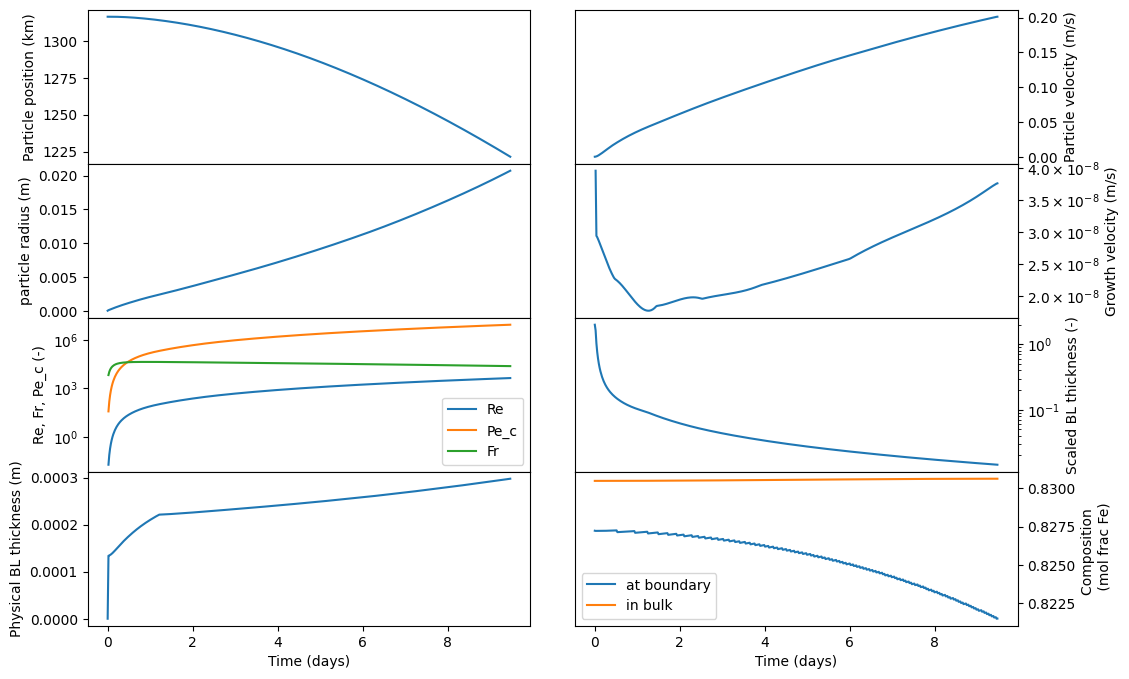

In [7]:
particle_evolution.plot_particle_evolution_time(data["solutions"][47], composition_function, temperature_function,
                                                pressure_function, data["chemical_diffusivity"], data["growth_prefactor"],
                                                gravity_function, data["kinematic_viscosity"])

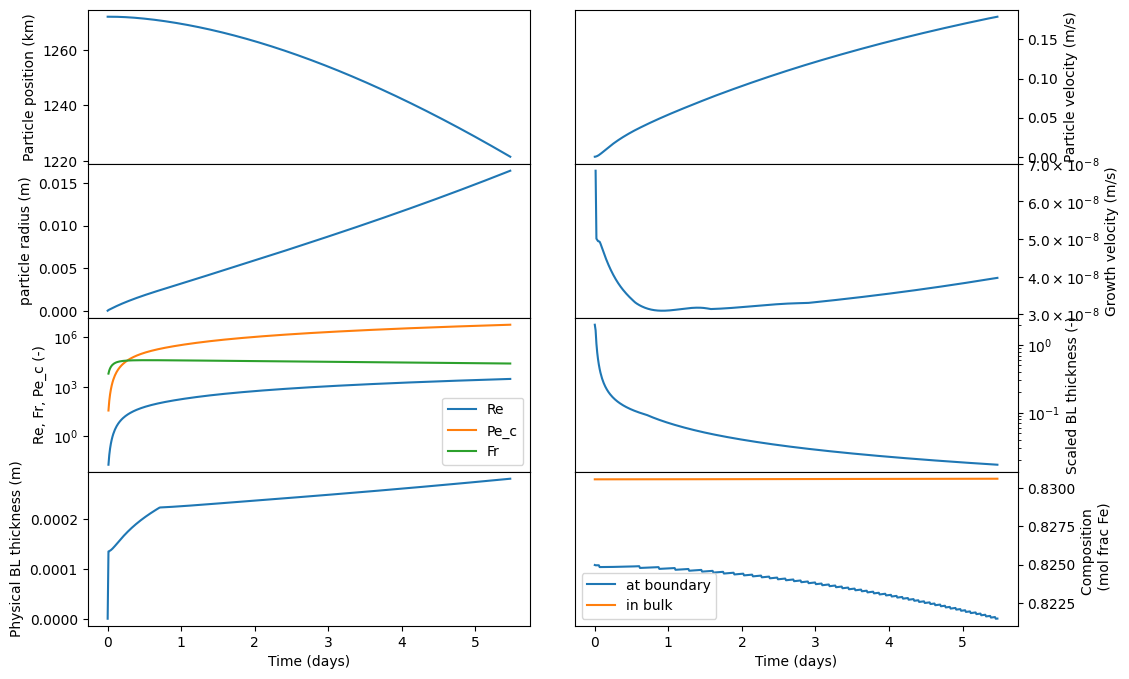

In [8]:
particle_evolution.plot_particle_evolution_time(data["solutions"][25], composition_function, temperature_function,
                                                pressure_function, data["chemical_diffusivity"], data["growth_prefactor"],
                                                gravity_function, data["kinematic_viscosity"])